<a href="https://colab.research.google.com/github/NasserMohamedEid/Predict-students-dropout/blob/main/predict_students_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict students' dropout and success

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score,log_loss, accuracy_score
from sklearn.model_selection import train_test_split,  cross_val_score

1-import data

In [ ]:
students=pd.read_csv('Students.csv',delimiter=";")

In [ ]:
students

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
students=pd.DataFrame(students)

In [ ]:
students

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


2-data information

In [ ]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [ ]:
students.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
students.duplicated().sum()

0

# Data Analysis

1- finding the correlation between the different variables

In [ ]:
corr_table=students.corr(method='pearson')
corr_table

C:\Users\Nasser\AppData\Local\Temp\ipykernel_2632\796917447.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_table=students.corr(method='pearson')


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Marital status,1.000000,0.224855,-0.125854,0.018925,-0.274939,0.120925,-0.020722,0.185522,0.128326,0.069734,...,0.034711,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003
Application mode,0.224855,1.000000,-0.246497,-0.085116,-0.268616,0.433028,-0.001360,0.092867,0.072798,0.033489,...,0.040255,0.228973,0.127461,0.164992,-0.065203,-0.104424,0.042009,0.091567,-0.019613,-0.014563
Application order,-0.125854,-0.246497,1.000000,0.118928,0.158657,-0.199029,-0.029385,-0.061719,-0.049936,-0.046591,...,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201
Course,0.018925,-0.085116,0.118928,1.000000,-0.070232,-0.158382,-0.004761,0.058909,0.045659,0.029672,...,-0.060483,-0.120390,0.185879,0.049236,0.120000,0.178997,-0.013984,-0.050116,0.028775,-0.012518
Daytime/evening attendance,-0.274939,-0.268616,0.158657,-0.070232,1.000000,-0.103022,0.024433,-0.195346,-0.137769,-0.037986,...,0.045630,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929
Previous qualification,0.120925,0.433028,-0.199029,-0.158382,-0.103022,1.000000,-0.038997,0.018868,0.013152,0.006190,...,0.018276,0.138463,0.056450,0.101501,-0.037265,-0.038765,0.024186,0.096914,-0.056388,0.053968
Nacionality,-0.020722,-0.001360,-0.029385,-0.004761,0.024433,-0.038997,1.000000,-0.043847,-0.088892,0.044123,...,0.026203,-0.000747,-0.020103,-0.018023,-0.014142,-0.005409,-0.012052,-0.006013,-0.012331,0.044563
Mother's qualification,0.185522,0.092867,-0.061719,0.058909,-0.195346,0.018868,-0.043847,1.000000,0.524529,0.295178,...,0.003293,0.036986,0.033070,0.018874,-0.013161,-0.028472,0.020364,-0.106107,0.056653,-0.079664
Father's qualification,0.128326,0.072798,-0.049936,0.045659,-0.137769,0.013152,-0.088892,0.524529,1.000000,0.207067,...,-0.017785,0.041695,0.023635,0.009471,0.006052,-0.006508,-0.008493,-0.075417,0.056661,-0.070200
Mother's occupation,0.069734,0.033489,-0.046591,0.029672,-0.037986,0.006190,0.044123,0.295178,0.207067,1.000000,...,-0.012569,-0.002057,0.009287,0.011546,0.022309,0.035230,-0.004903,-0.011772,0.015014,0.091880


<Axes: >

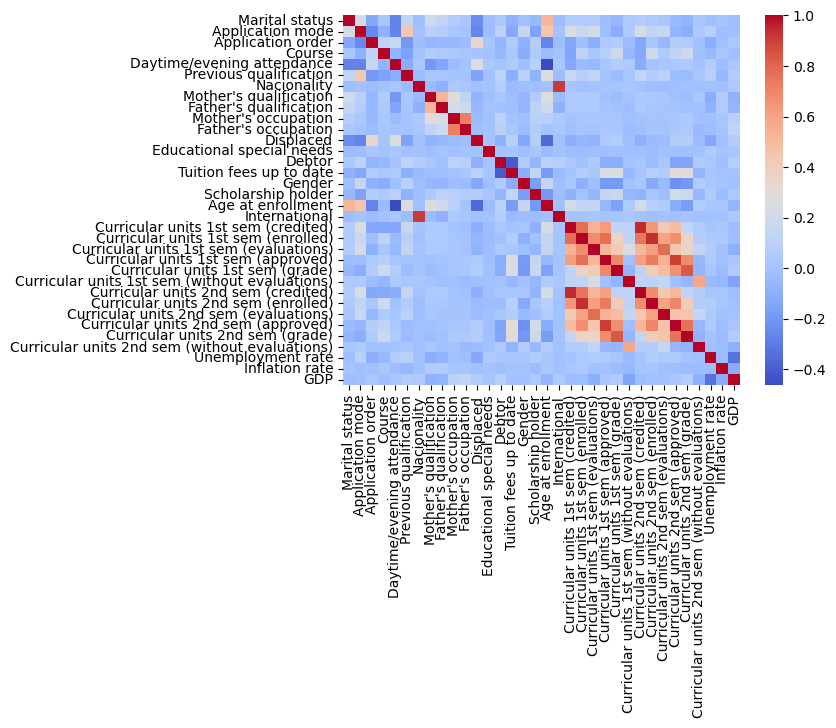

In [ ]:
import seaborn as sns

sns.heatmap(corr_table,
        xticklabels=corr_table.columns,
        yticklabels=corr_table.columns,cmap='coolwarm')

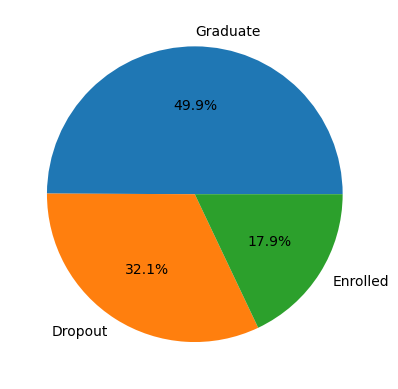

In [ ]:
st_summary = students['Target'].value_counts()

plt.pie(st_summary, labels=st_summary.index, autopct='%1.1f%%')
plt.show()

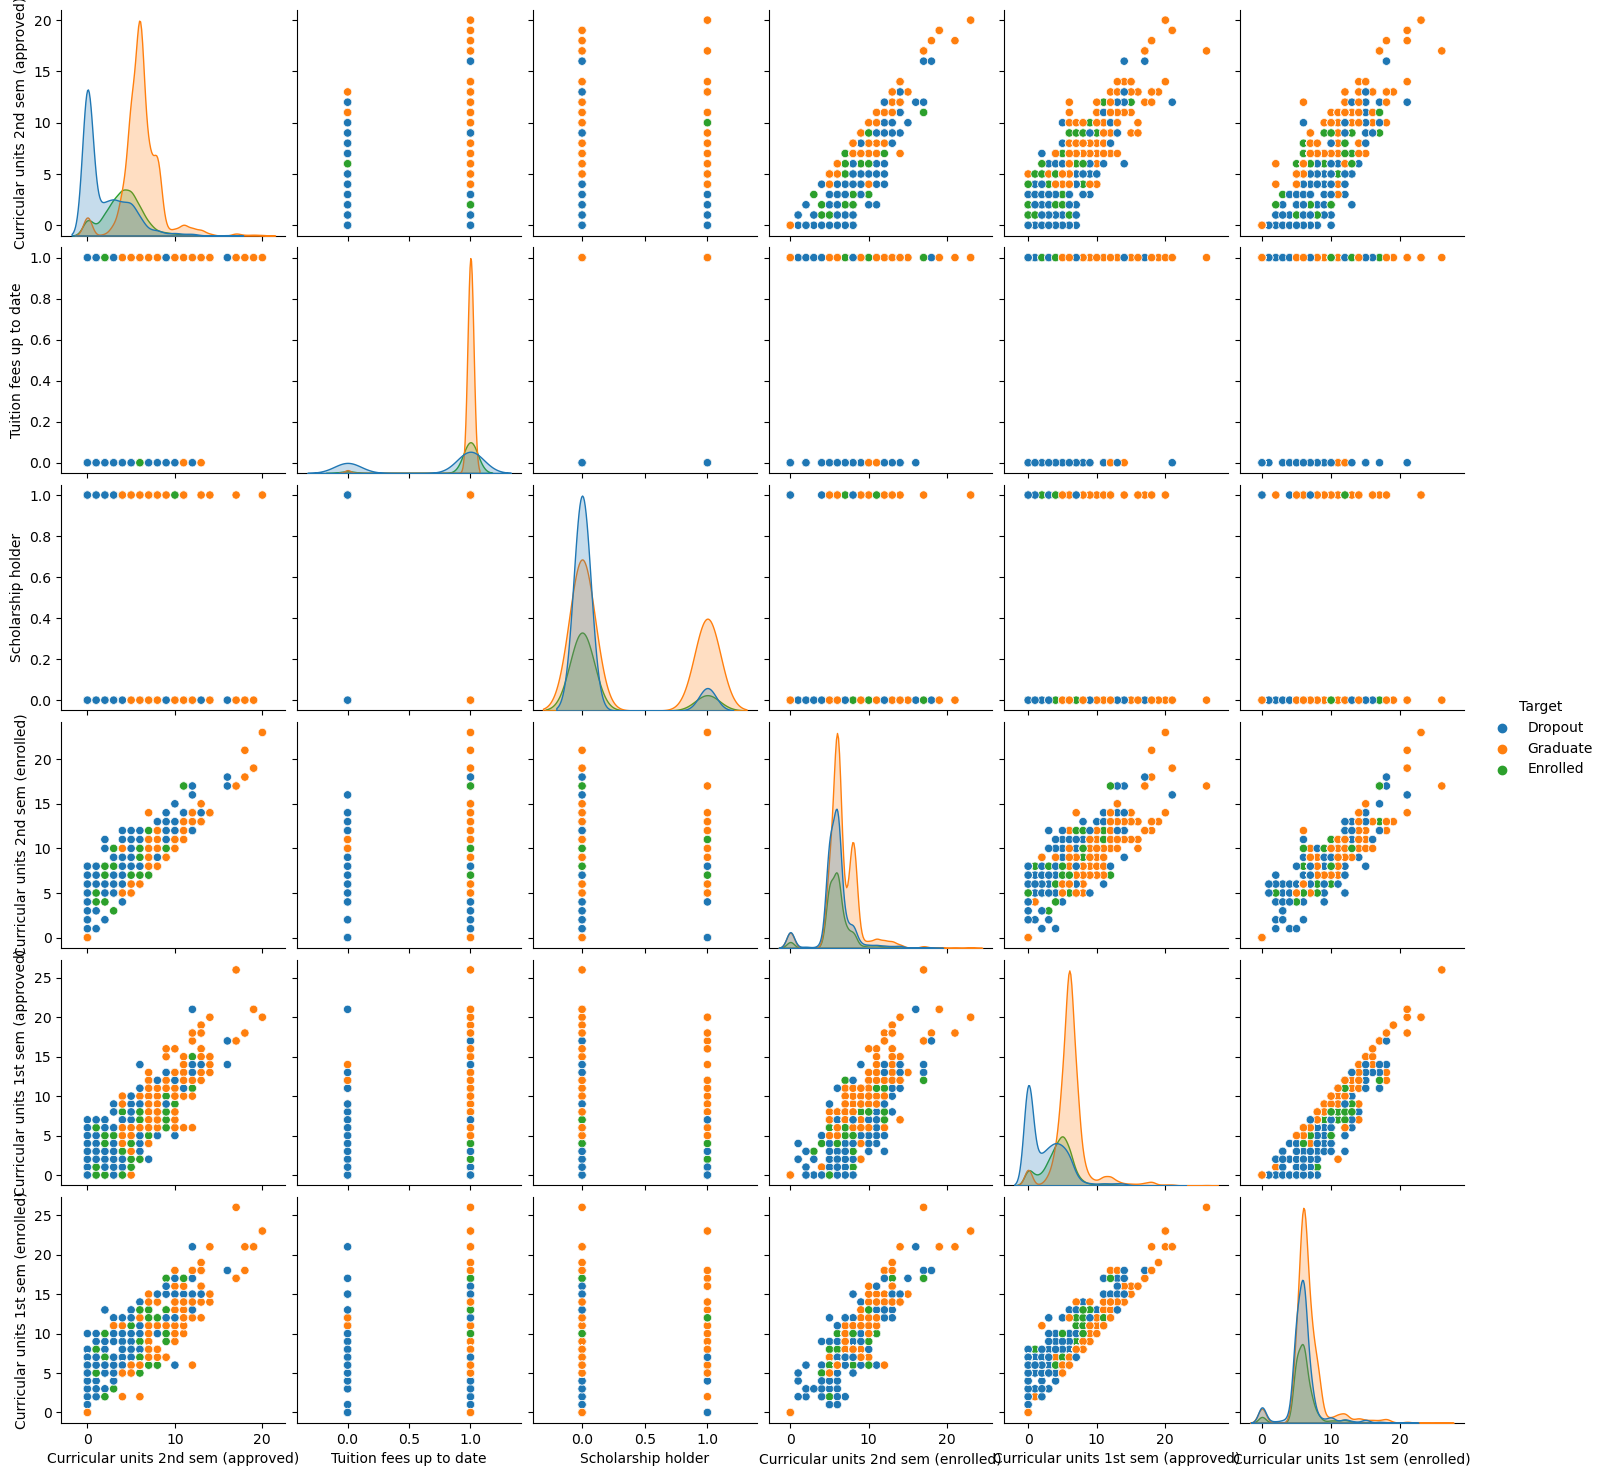

In [ ]:
dataset_important = students[['Target',
                             'Curricular units 2nd sem (approved)',
                             'Tuition fees up to date',
                             'Scholarship holder',
                             'Curricular units 2nd sem (enrolled)',
                             'Curricular units 1st sem (approved)',
                             'Curricular units 1st sem (enrolled)']]


g1 = sns.pairplot(dataset_important, hue='Target')
plt.show()

Demographics

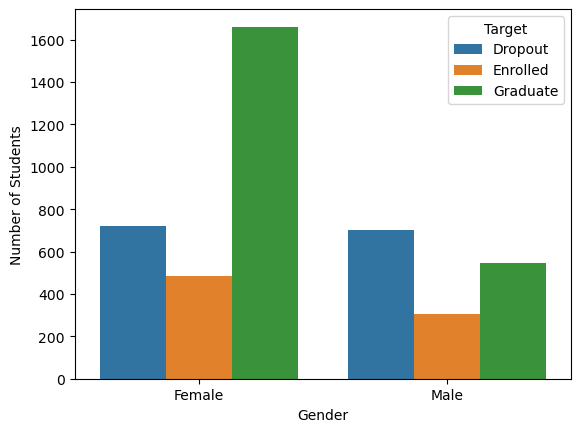

In [ ]:
sns.countplot(data=students, x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])
plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.ylabel('Number of Students')
plt.show()

In [ ]:
students_df=students.copy()
students_df.replace("Dropout",1,inplace=True)
students_df.replace("Graduate",0,inplace=True)

students_df.drop(students_df[students_df["Target"]=="Enrolled"].index,inplace=True)
students_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,0
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,1
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,1
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,0


In [ ]:
y=students_df["Target"]
y=y.astype('int')
y

0       1
1       0
2       1
3       0
4       0
       ..
4419    0
4420    1
4421    1
4422    0
4423    0
Name: Target, Length: 3630, dtype: int32

In [ ]:
X=students_df.iloc[:,:-1]
X

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,6,1,11,1,1,1,1,3,4,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,5,1,1,1,22,27,10,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,8,2,15,1,1,1,23,27,6,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,12,1,3,0,1,1,22,28,10,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
4420,1,1,2,15,1,1,19,1,1,10,...,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
4421,1,1,1,12,1,1,1,22,27,10,...,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
4422,1,1,1,9,1,1,1,22,27,8,...,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12


# Data Modelling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
clf = LogisticRegression()

# Without Scaling
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

C:\Users\Nasser\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nasser\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Without Scaling and without CV:  0.918732782369146
Without Scaling and With CV:  0.9132148358810286


C:\Users\Nasser\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nasser\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [ ]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))

Accuracy Score:  0.918732782369146
Precision Score:  0.9260700389105059
Recall Score:  0.8561151079136691


In [ ]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=1000, tol=1e-3)

# Without Scaling
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without CV:  0.9008264462809917
Without Scaling and With CV:  0.8735703282379429


In [ ]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
# Without Scaling
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without CV:  0.8953168044077136
Without Scaling and With CV:  0.8546486550539164


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without CV:  0.8292011019283747
Without Scaling and With CV:  0.8233321483588103


In [ ]:
log_reg = LogisticRegression()

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)
    log_reg.fit(X=X_train, y=y_train)

y_pred = log_reg.predict(X_test)

# cross-entropy loss
cel = log_loss(y_test, y_pred)

print("Cross-Entropy Loss:", cel)

Cross-Entropy Loss: 2.9291674241844516


In [ ]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))

Accuracy Score:  0.918732782369146
Precision Score:  0.9260700389105059
Recall Score:  0.8561151079136691
